

# Introduction

- The data was collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

- The dataset Contains:
- 6819 rows and 96 features

- The objective of this project is to use these features to understand their impact/role on the selected models and how they can help us recognizing the companies that are close to bankrupcty

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

In [ ]:
#Importing the Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Importing the dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BIA/BIA Capstone Project/data.csv')

In [ ]:
# Checking shape of the dataset
df.shape

(6819, 96)

In [ ]:
# Reading the first 5 rows in the dataset

df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [ ]:
df.tail()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  ...  \
6814                                      0.303510  ...   
6815                                      0.303520  ...   
6816                                      0.303512  ...   
6817                                      0.303498  ...   
6818                                      0.313415  ...   

       Net Income to Total Assets   Total assets to GNP price  \
6814                     0.799927                    0.000466   
6815                     0.799748                    0.001959   
6816                     0.797778                    0.002840   
6817                     0.811808                    0.002837   
6818                     0.815956                    0.000707   

       No-credit Interval   Gross Profit to Sales  \
6814             0.623620                0.604455   
6815             0.623931                0.598306   
6816             0.624156                0.610441   
6817             0.623957                0.607846   
6818             0.626680                0.627408   

       Net Income to Stockholder's Equity   Liability to Equity  \
6814                             0.840359              0.279606   
6815                             0.840306              0.278132   
6816                             0.840138              0.275789   
6817                             0.841084              0.277547   
6818                             0.841019              0.275114   

       Degree of Financial Leverage (DFL)  \
6814                             0.027064   
6815                             0.027009   
6816                             0.026791   
6817                             0.026822   
6818                             0.026793   

       Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
6814                                           0.566193                   1   
6815                 

- The dataset is composed of a combination of 6819 observations and there are 96 features including the Target variable
- we  will obviously need to decompose the features for better prediction

In [ ]:
# Cheking the null values in the dataset

df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [ ]:
# Getting the number of missing values in each column
# Excluding columns that contains 0 missing values

[print(col) for col in df if df[col].isna().sum() > 0]

[]

From the results above, there are no missing/null value in this dataset

In [ ]:
df.duplicated().sum()

0

There are no duplicate or null values in the data frame.

In [ ]:
# checking the datatype of the features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

- All of the features are numerical (int64 or float64)
- There are no missing values among the data


In [ ]:
# descriptive statistics of the numrerical features

df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [ ]:
#let us check the Target variable

df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

Text(0.5, 1.0, 'Target Class Distribution - Bankrupt?')

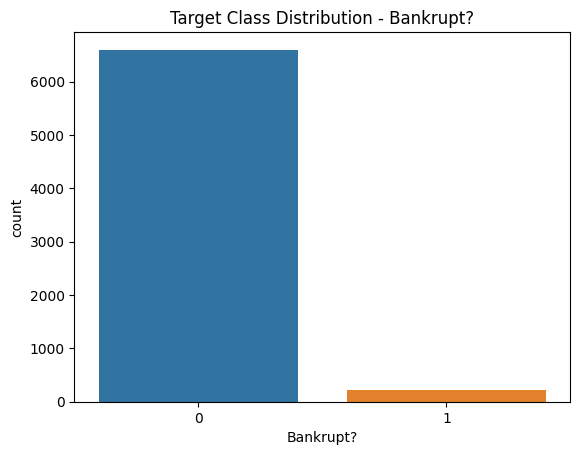

In [ ]:
sns.countplot(x=df['Bankrupt?'])
plt.title('Target Class Distribution - Bankrupt?')

In [ ]:
print('Companies that did not go bankrupt: ', round(df['Bankrupt?'].value_counts()[0]/len(df) * 100,1), '% of whole data set')
print('Companies that went bankrupt: ', round(df['Bankrupt?'].value_counts()[1]/len(df) * 100,1), '% of whole data set')

Companies that did not go bankrupt:  96.8 % of whole data set
Companies that went bankrupt:  3.2 % of whole data set


- The company which are bankrupted are very less compared to non bankrupt companies.
- Our dataset is an imbalanced dataset.
- we need to use oversampling method to correct it.
- This is the main obstacle that we need to solve to obtain good performance.

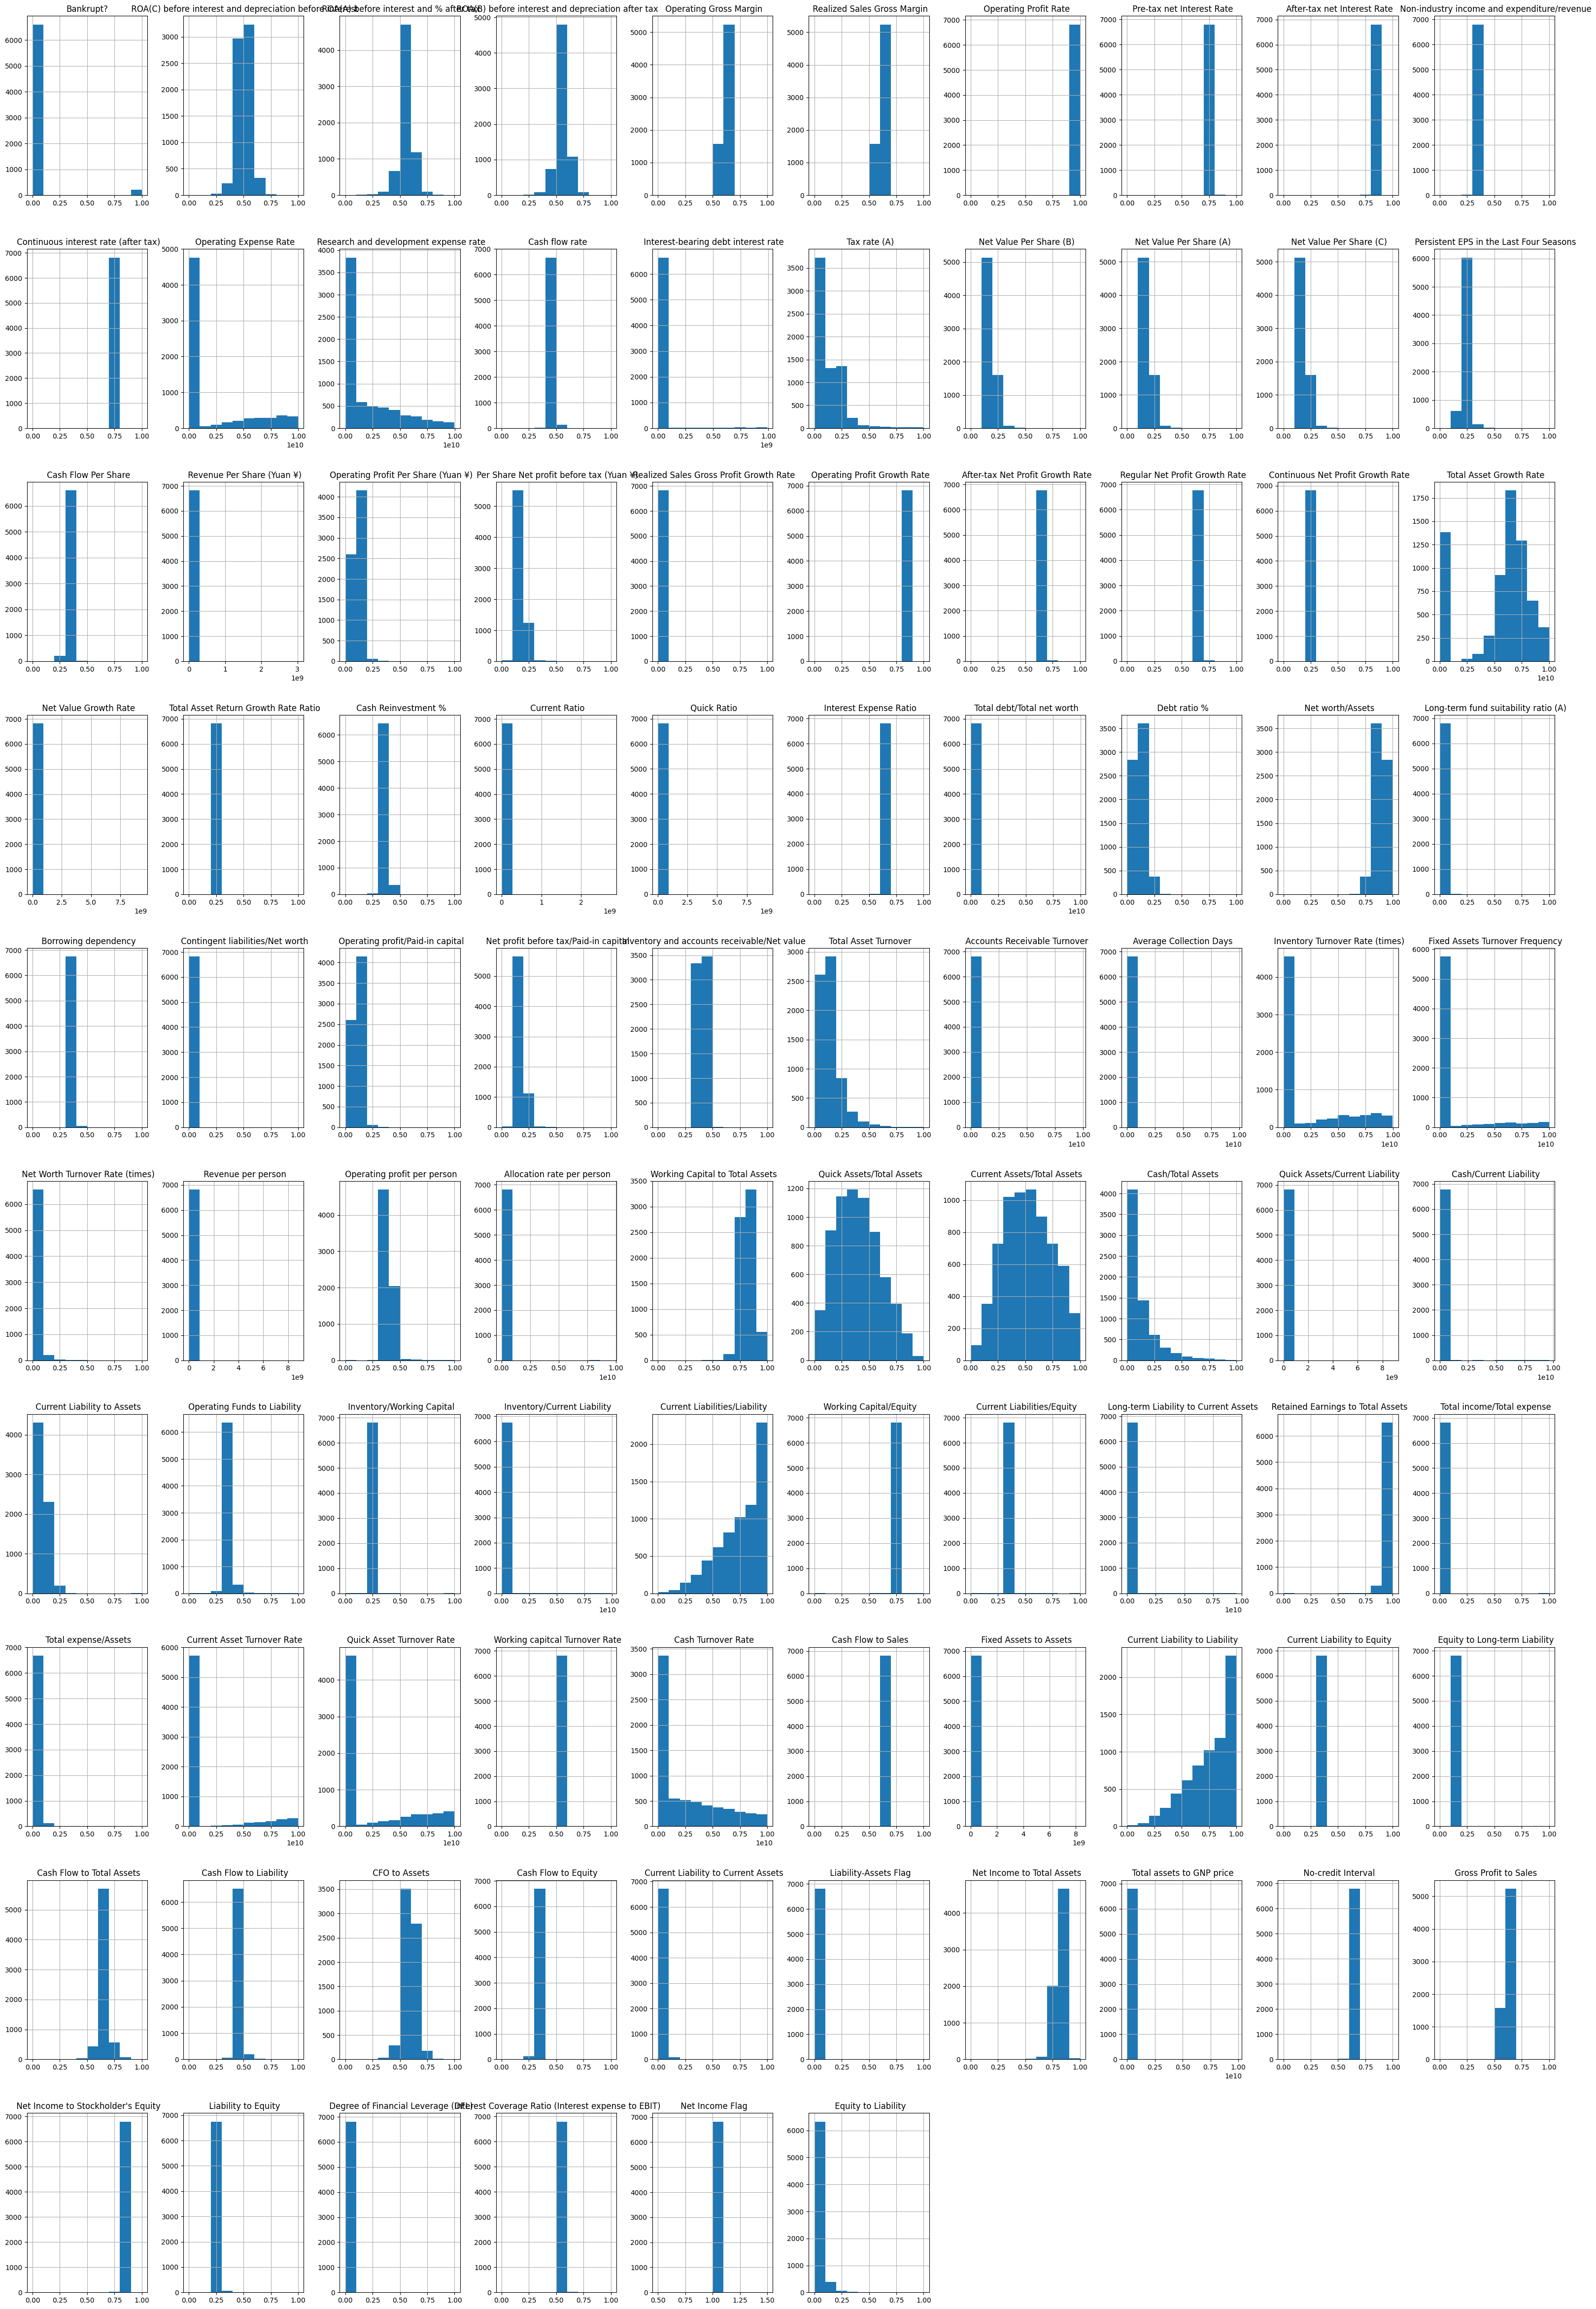

In [ ]:
# see the distribution of all the features
df.hist(figsize=(40,60))
plt.show()

- If we observe carefully most of the columns are skewed.
This means many of the data points lie towards it's minimum or maximum.
- For Example, observe **Operating Expense Rate** and **Research and development expense rate**.
- This means model will not be able distuingish well between yes and no as most value lie towards one end.
- Hence we'll need to reduce the skewness.

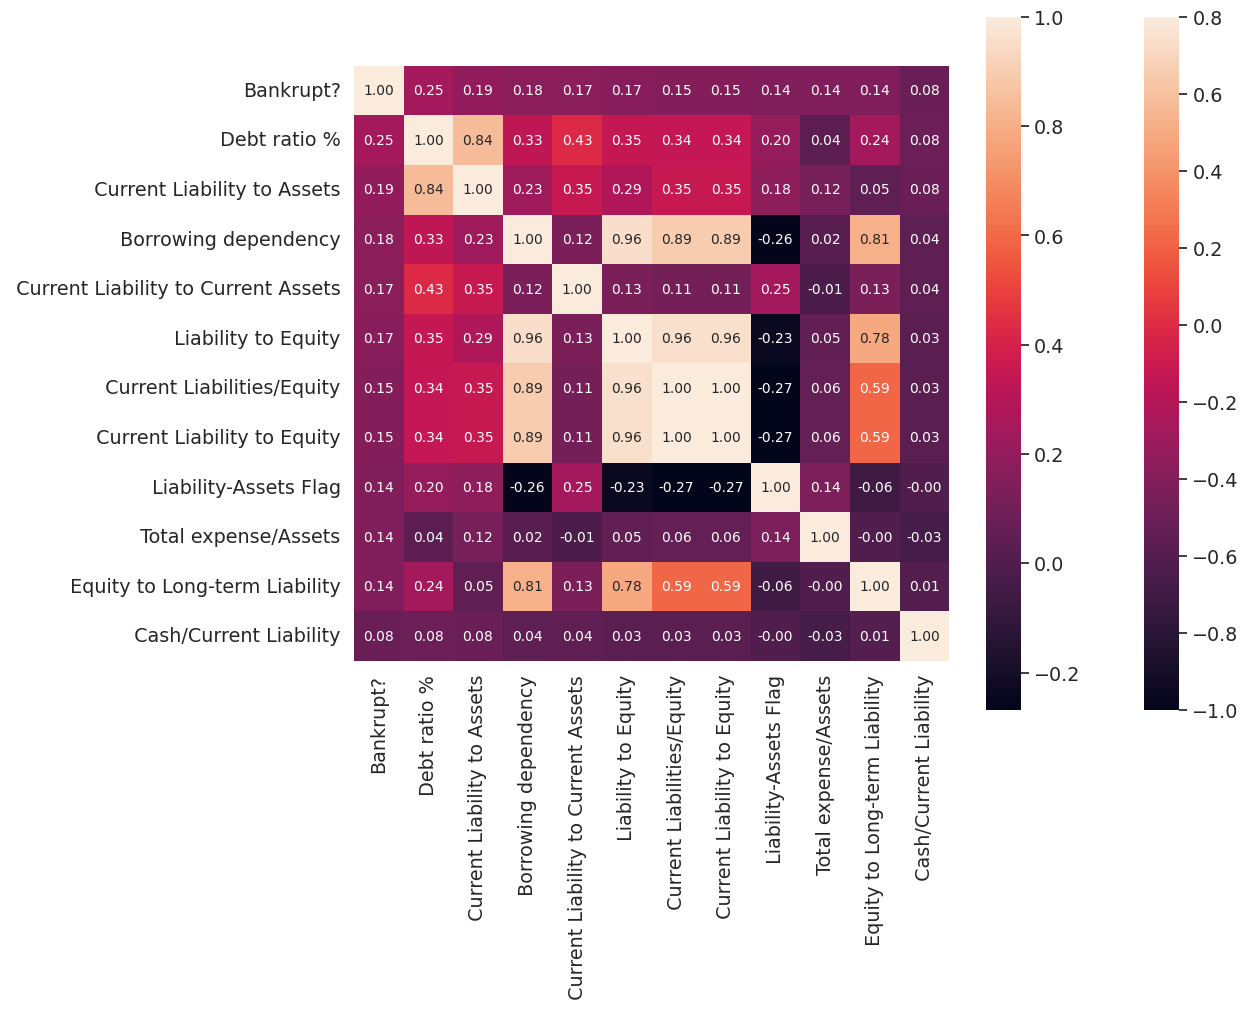

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
# Top 12 Heatmap
k = 12 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Bankrupt?')['Bankrupt?'].index
# Correlation Matrix Heatmap
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



In [ ]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

Most Correlated Features
0                              Bankrupt?
1                           Debt ratio %
2            Current Liability to Assets
3                   Borrowing dependency
4    Current Liability to Current Assets
5                    Liability to Equity
6             Current Liabilities/Equity
7            Current Liability to Equity
8                  Liability-Assets Flag
9                   Total expense/Assets
10         Equity to Long-term Liability
11                Cash/Current Liability

In [ ]:
numeric_features = df.select_dtypes(include=["float64"]).columns
categorical_features = df.select_dtypes(include=["int64"]).columns
print(categorical_features)

Index(['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag'], dtype='object')


- Through data.info(), we observed that we have a majority of "float64" data.
- The categorical data is distinguished as binary 1 and 0, thus stored as "int64".
- We'll separate the numeric and categoric data to analyze our dataset.

- Since, There are only three categorical data columns, we will first explore these columns

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64


<Axes: xlabel=' Liability-Assets Flag', ylabel='count'>

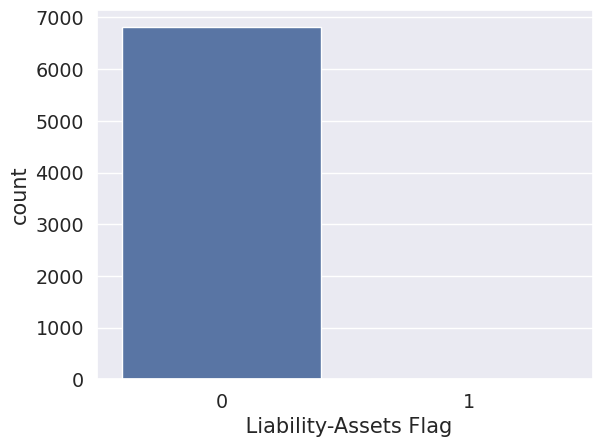

In [ ]:
print(df[' Liability-Assets Flag'].value_counts())
sns.countplot(x=' Liability-Assets Flag',data=df)

- The "Liability-Assets" flag denotes the status of an organization, where if the total liability exceeds total assets, the flagged value will be 1, else the value is 0.
- A majority number of times, organizations/company's assets are more than their liabilities.

 Liability-Assets Flag  Bankrupt?
0                       0            6597
                        1             214
1                       1               6
                        0               2
dtype: int64


<Axes: xlabel=' Liability-Assets Flag', ylabel='count'>

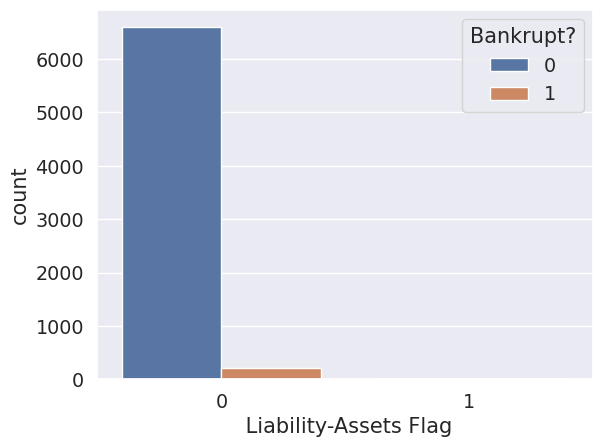

In [ ]:
print(df[[' Liability-Assets Flag','Bankrupt?']].value_counts())
sns.countplot(x = ' Liability-Assets Flag',hue = 'Bankrupt?',data = df)

- A small portion of organizations suffers bankruptcy, although possessing more assets than their liabilities.

1    6819
Name:  Net Income Flag, dtype: int64


<Axes: xlabel=' Net Income Flag', ylabel='count'>

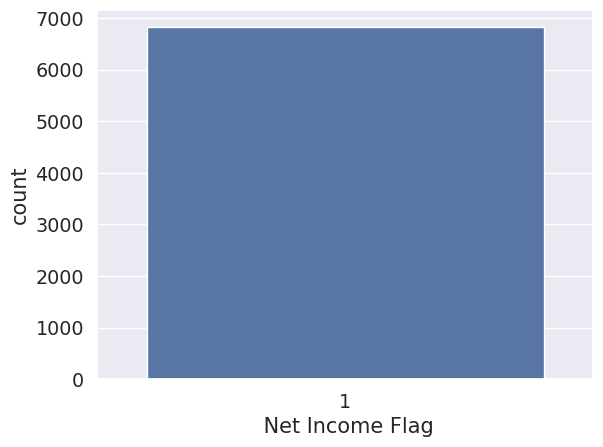

In [ ]:
print(df[' Net Income Flag'].value_counts())
sns.countplot(x=' Net Income Flag',data=df)

- The "Net Income" flag denotes the status of an organization's income, where if the net income is negative, the flagged value will be 1, else the value is 0.
- We observe that all the records have been exhibiting a loss.



 Net Income Flag  Bankrupt?
1                 0            6599
                  1             220
dtype: int64


<Axes: xlabel=' Net Income Flag', ylabel='count'>

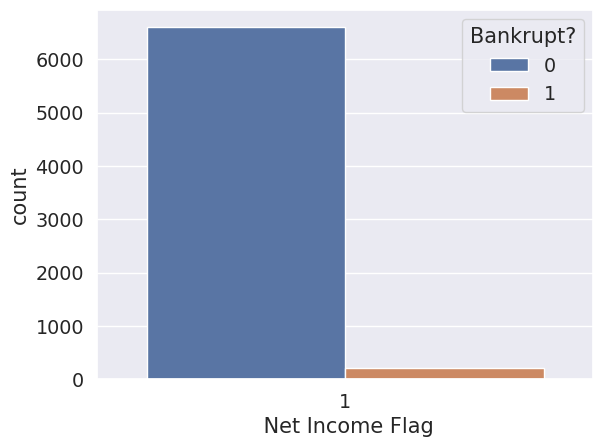

In [ ]:
print(df[[' Net Income Flag','Bankrupt?']].value_counts())
sns.countplot(x = ' Net Income Flag',hue = 'Bankrupt?',data = df)

- Many organizations that have suffered losses have stabilized their business, thus avoiding bankruptcy.



<Axes: xlabel=' Liability-Assets Flag', ylabel='count'>

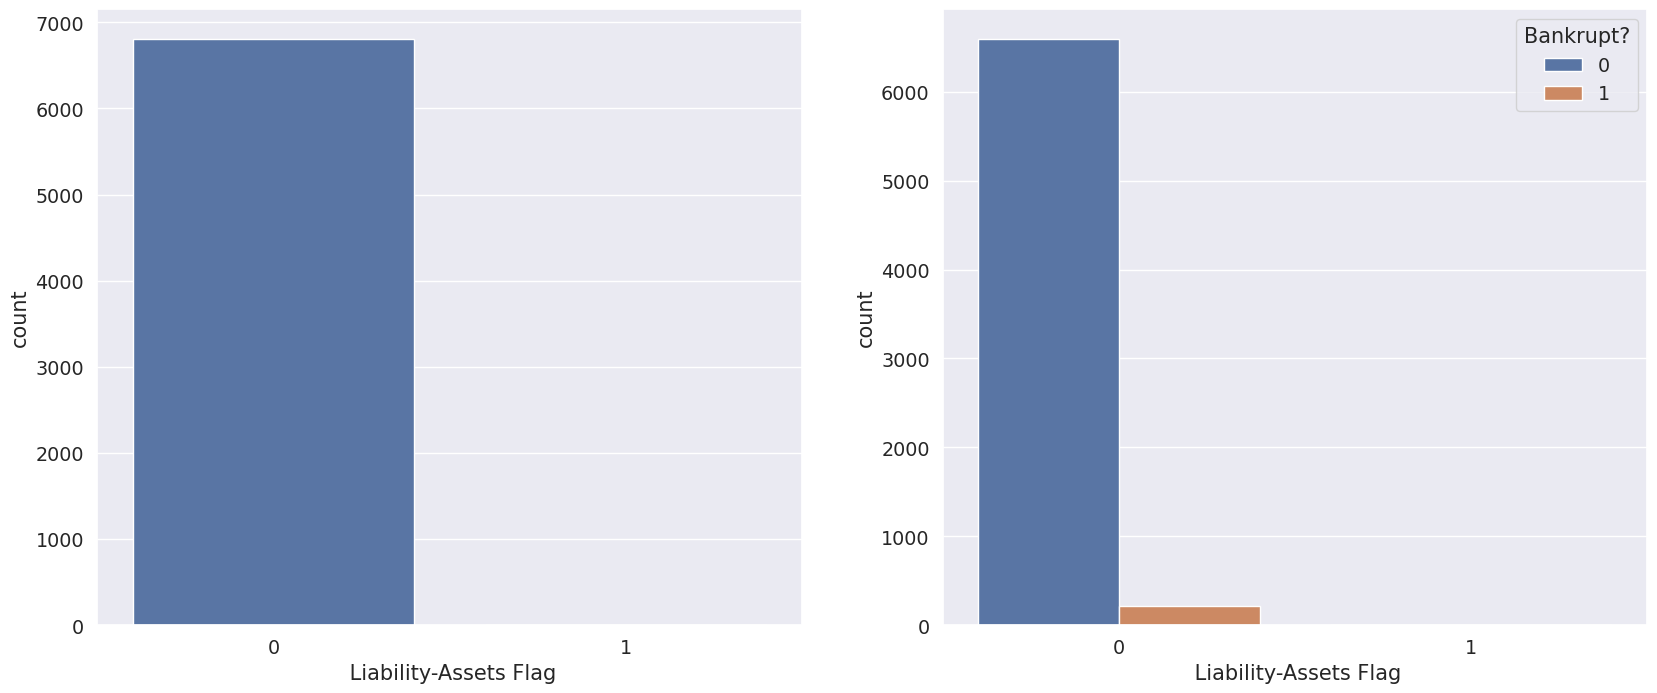

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(data=df, x=categorical_features[1], ax=ax[0])
sns.countplot(data=df, x=categorical_features[1], hue="Bankrupt?", ax=ax[1])

- Only a small fraction of companies go bankrupt, even if they have more assets than liabilities
- In comparison, more companies go bankrupt with fewer assets than liabilities

<Axes: xlabel=' Net Income Flag', ylabel='count'>

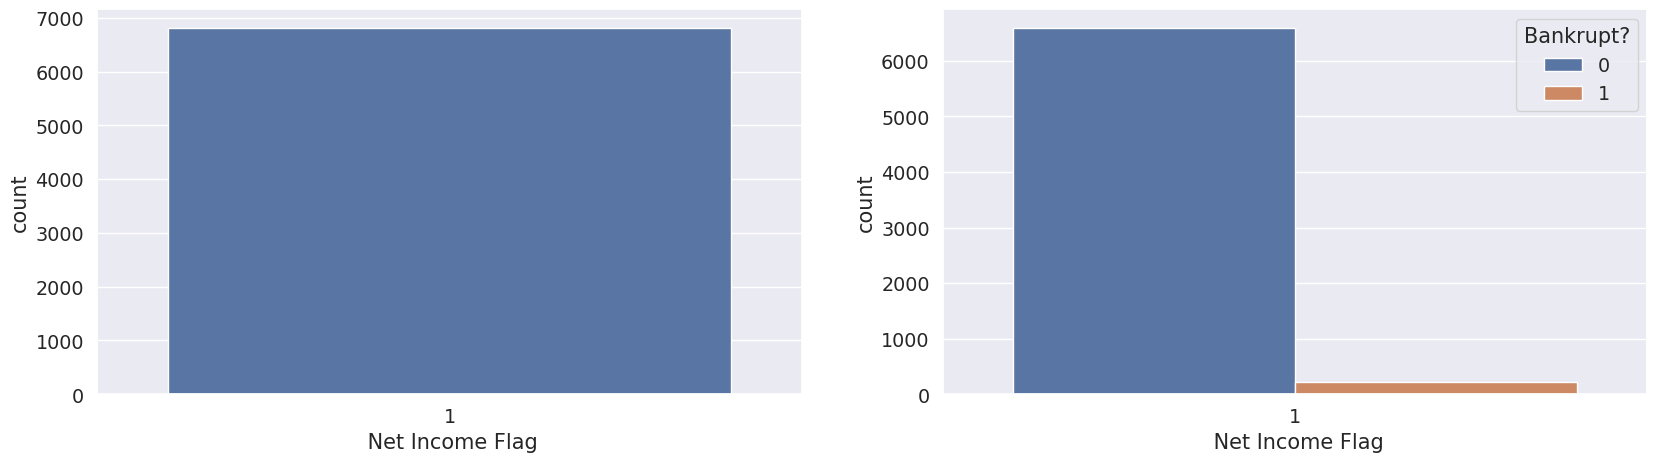

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(data=df, x=categorical_features[2], ax=ax[0])
sns.countplot(data=df, x=categorical_features[2], hue="Bankrupt?", ax=ax[1])

- A small number of companies have been bankrupt with negative net income.

In [ ]:
#Focusing on top 6 +vely & -vely correlated features

positive_corr = (
    df[numeric_features]
    .corrwith(df["Bankrupt?"])
    .sort_values(ascending=False)[:6]
    .index.tolist()
)
negative_corr = (
    df[numeric_features].corrwith(df["Bankrupt?"]).sort_values()[:6].index.tolist()
)
print(f"{positive_corr}\n\n{negative_corr}")

[' Debt ratio %', ' Current Liability to Assets', ' Borrowing dependency', ' Current Liability to Current Assets', ' Liability to Equity', ' Current Liabilities/Equity']

[' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Net worth/Assets', ' Persistent EPS in the Last Four Seasons']


Text(0.5, 0.98, 'Positive correlations')

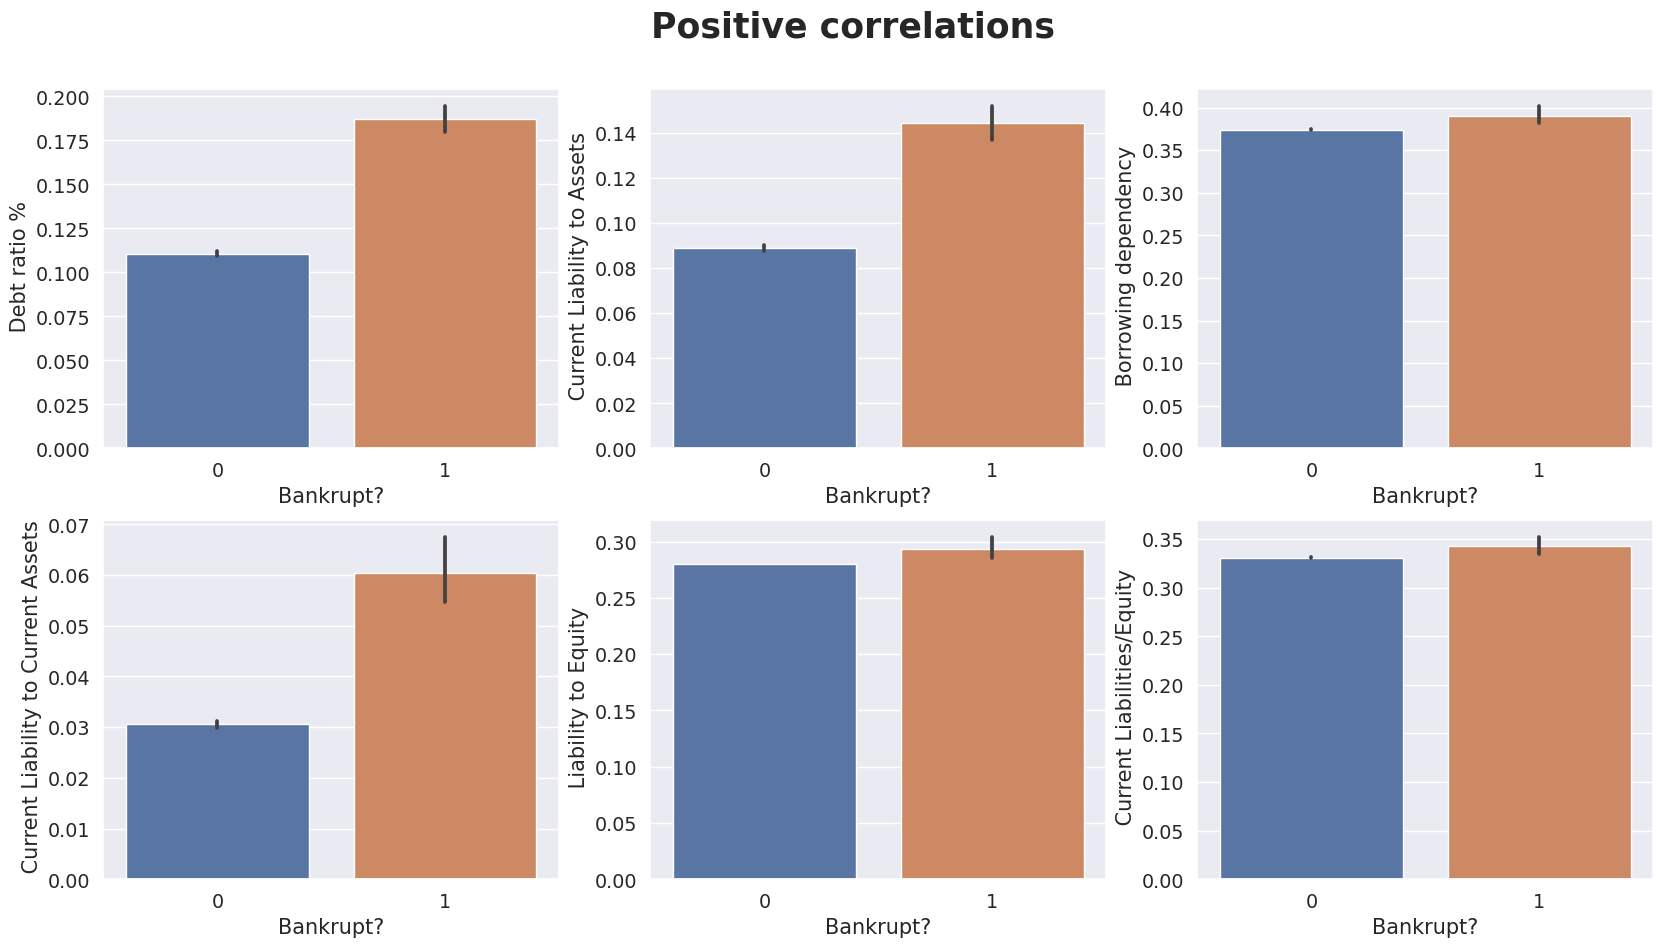

In [ ]:
col = 0
row = 0

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for column in positive_corr:
    sns.barplot(data=df, y=column, x="Bankrupt?", ax=ax[row, col])

    col += 1
    if col > 2:
        row += 1
        col = 0

fig.subplots_adjust(top=0.90)
plt.suptitle("Positive correlations", fontweight="bold", fontsize=25)

- We can see that for bankrupt companies Debt %, Current Liabilities to Assets and Current Liabilities to Current Assets have high values

Text(0.5, 0.98, 'Negative correlations')

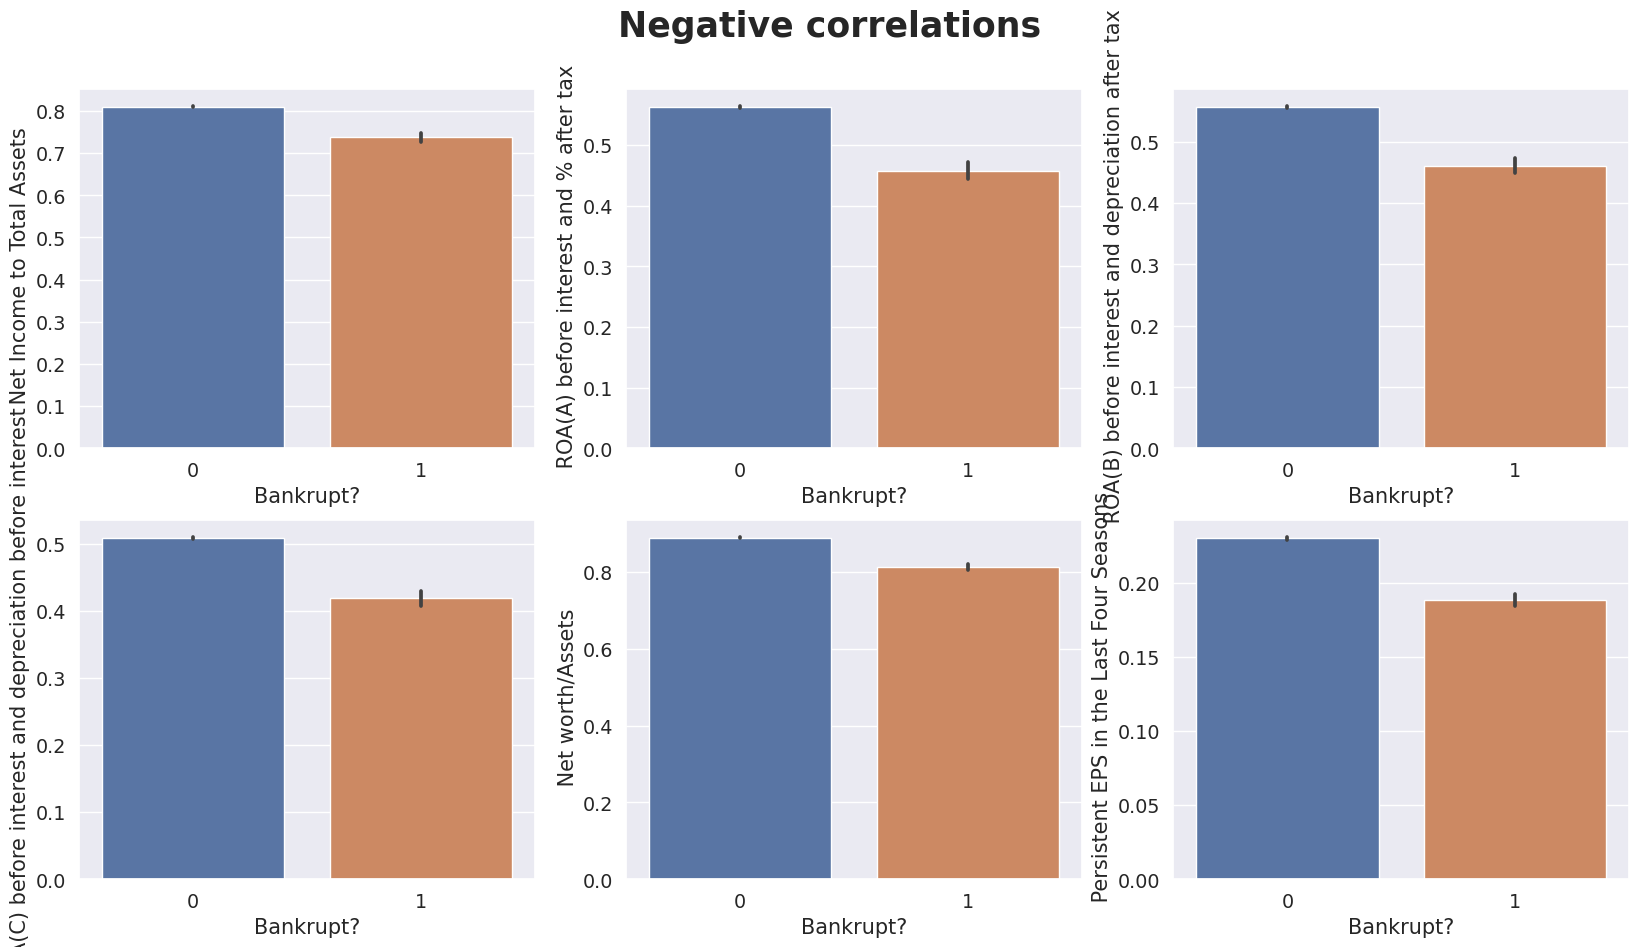

In [ ]:
col = 0
row = 0

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for column in negative_corr:
    sns.barplot(data=df, y=column, x="Bankrupt?", ax=ax[row, col])

    col += 1
    if col > 2:
        row += 1
        col = 0

fig.subplots_adjust(top=0.90)
plt.suptitle("Negative correlations", fontweight="bold", fontsize=25)

- The higher the assets and profits, the less likely the company is to go bankrupt.
- These attributes show us that the more the assets and earing of a company, the less likely is the organization to be bankrupt.

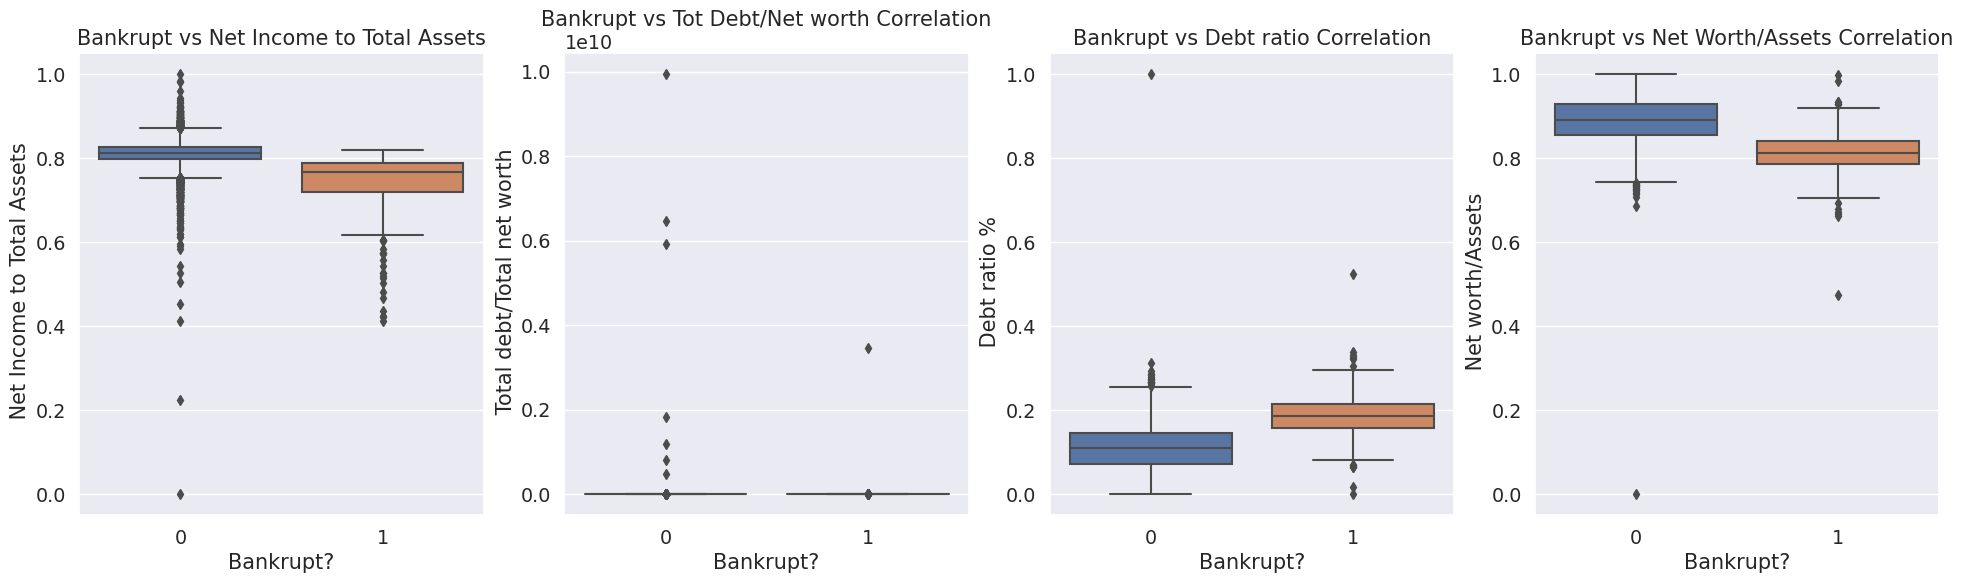

In [ ]:
# Plotting interesting features

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y=" Net Income to Total Assets", data=df, ax=axes[0])
axes[0].set_title('Bankrupt vs Net Income to Total Assets')

sns.boxplot(x='Bankrupt?', y=" Total debt/Total net worth", data=df, ax=axes[1])
axes[1].set_title('Bankrupt vs Tot Debt/Net worth Correlation')


sns.boxplot(x='Bankrupt?', y=" Debt ratio %", data=df, ax=axes[2])
axes[2].set_title('Bankrupt vs Debt ratio Correlation')


sns.boxplot(x='Bankrupt?', y=" Net worth/Assets", data=df, ax=axes[3])
axes[3].set_title('Bankrupt vs Net Worth/Assets Correlation')

plt.show()

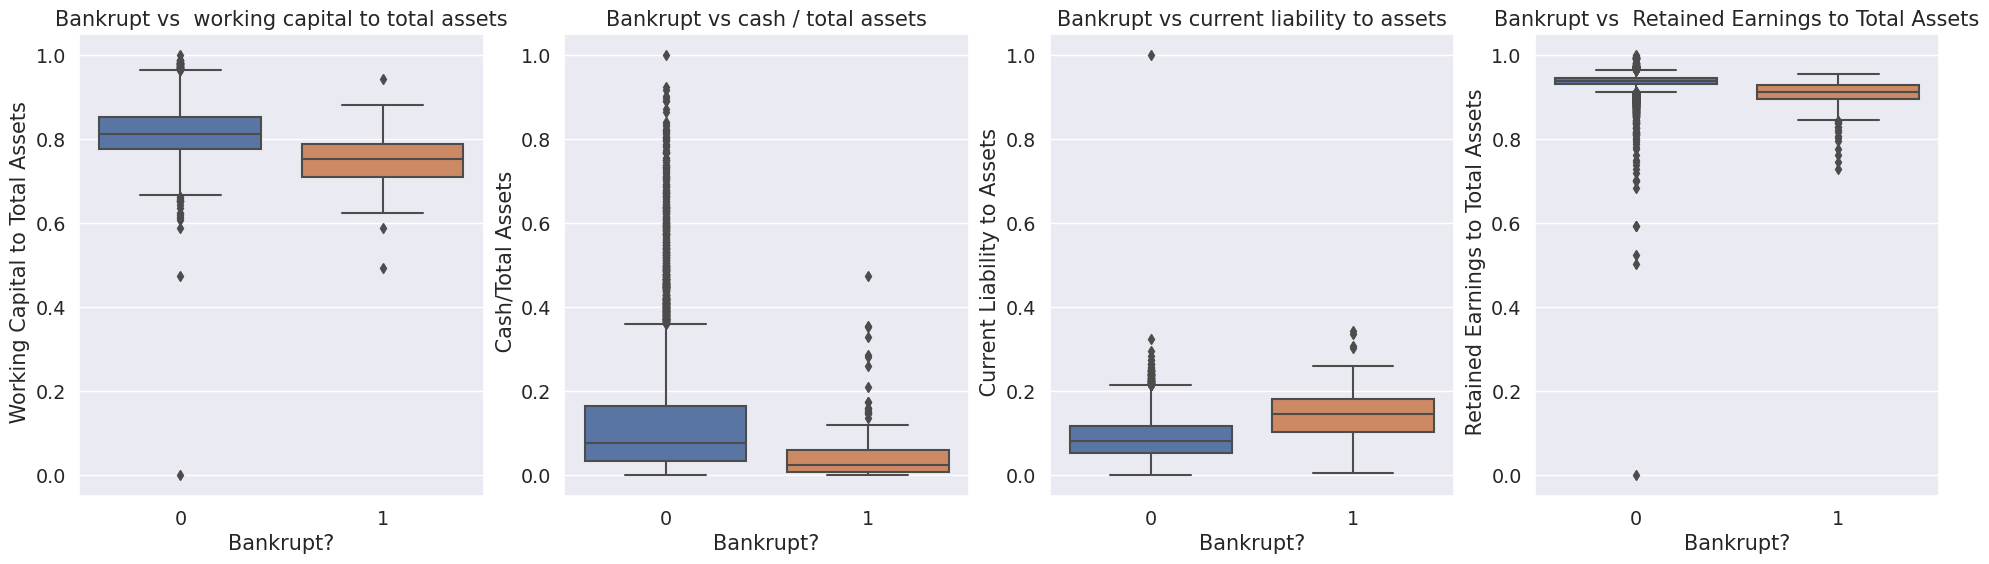

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y=" Working Capital to Total Assets", data=df, ax=axes[0])
axes[0].set_title('Bankrupt vs  working capital to total assets')

sns.boxplot(x='Bankrupt?', y=" Cash/Total Assets", data=df, ax=axes[1])
axes[1].set_title('Bankrupt vs cash / total assets')


sns.boxplot(x='Bankrupt?', y=" Current Liability to Assets", data=df, ax=axes[2])
axes[2].set_title('Bankrupt vs current liability to assets')


sns.boxplot(x='Bankrupt?', y=" Retained Earnings to Total Assets", data=df, ax=axes[3])
axes[3].set_title('Bankrupt vs  Retained Earnings to Total Assets')

plt.show()

In [ ]:
df.corrwith(df['Bankrupt?'])

Bankrupt?                                                   1.000000
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 Operating Gross Margin                                    -0.100043
                                                              ...   
 Liability to Equity                                        0.166812
 Degree of Financial Leverage (DFL)                         0.010508
 Interest Coverage Ratio (Interest expense to EBIT)        -0.005509
 Net Income Flag                                                 NaN
 Equity to Liability                                       -0.083048
Length: 96, dtype: float64

- Correlation means how directly or indirectly our column effects another column.
- +1 means direct, i.e increase in column will lead increase in label value.
- -1 for just the opposite

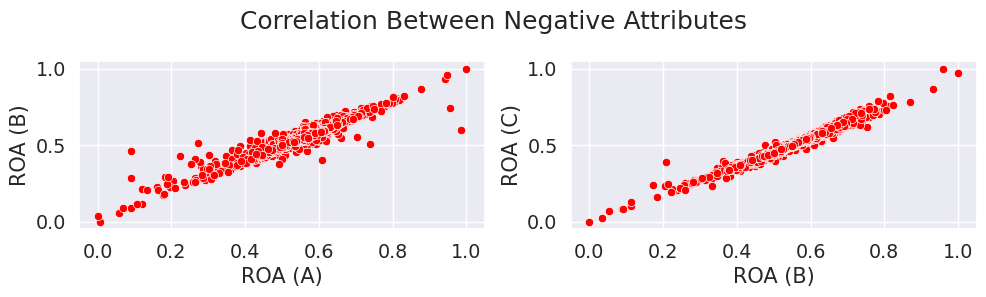

In [ ]:
# Let us check the relation of top six positive and negative correlation attributes among eachother
plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Negative Attributes")

plt.subplot(1,2,1)
plt.xlabel("ROA (A)")
plt.ylabel("ROA (B)")
sns.scatterplot(data=df, x=' ROA(A) before interest and % after tax', y=' ROA(B) before interest and depreciation after tax',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("ROA (B)")
plt.ylabel("ROA (C)")
sns.scatterplot(data=df, x=' ROA(B) before interest and depreciation after tax', y=' ROA(C) before interest and depreciation before interest',color = 'red')

plt.tight_layout(pad=0.8)

- There is a positive relation between attributes that have a low correlation with the target attribute.

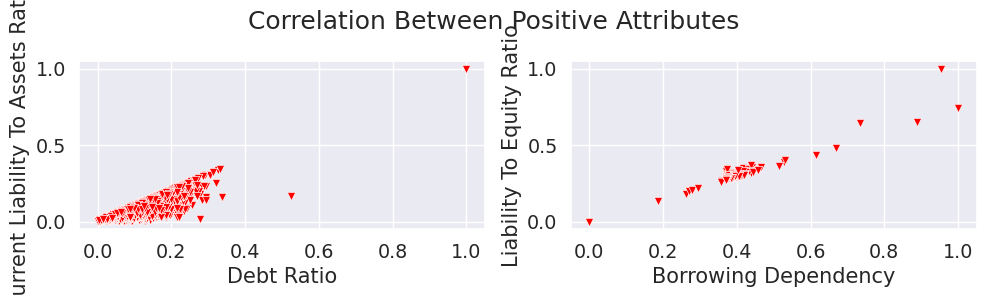

In [ ]:
plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Positive Attributes")

plt.subplot(1,2,1)
plt.xlabel("Debt Ratio")
plt.ylabel("Current Liability To Assets Ratio")
sns.scatterplot(data=df,x=df[" Debt ratio %"],y=df[" Current Liability to Assets"], marker='v',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("Borrowing Dependency")
plt.ylabel("Liability To Equity Ratio")
sns.scatterplot(data=df,x=df[" Borrowing dependency"],y=df[' Liability to Equity'], marker='v',color = 'red')

plt.tight_layout(pad=0.8)

- There is a positive relation between attributes that have a high correlation with the target attribute.

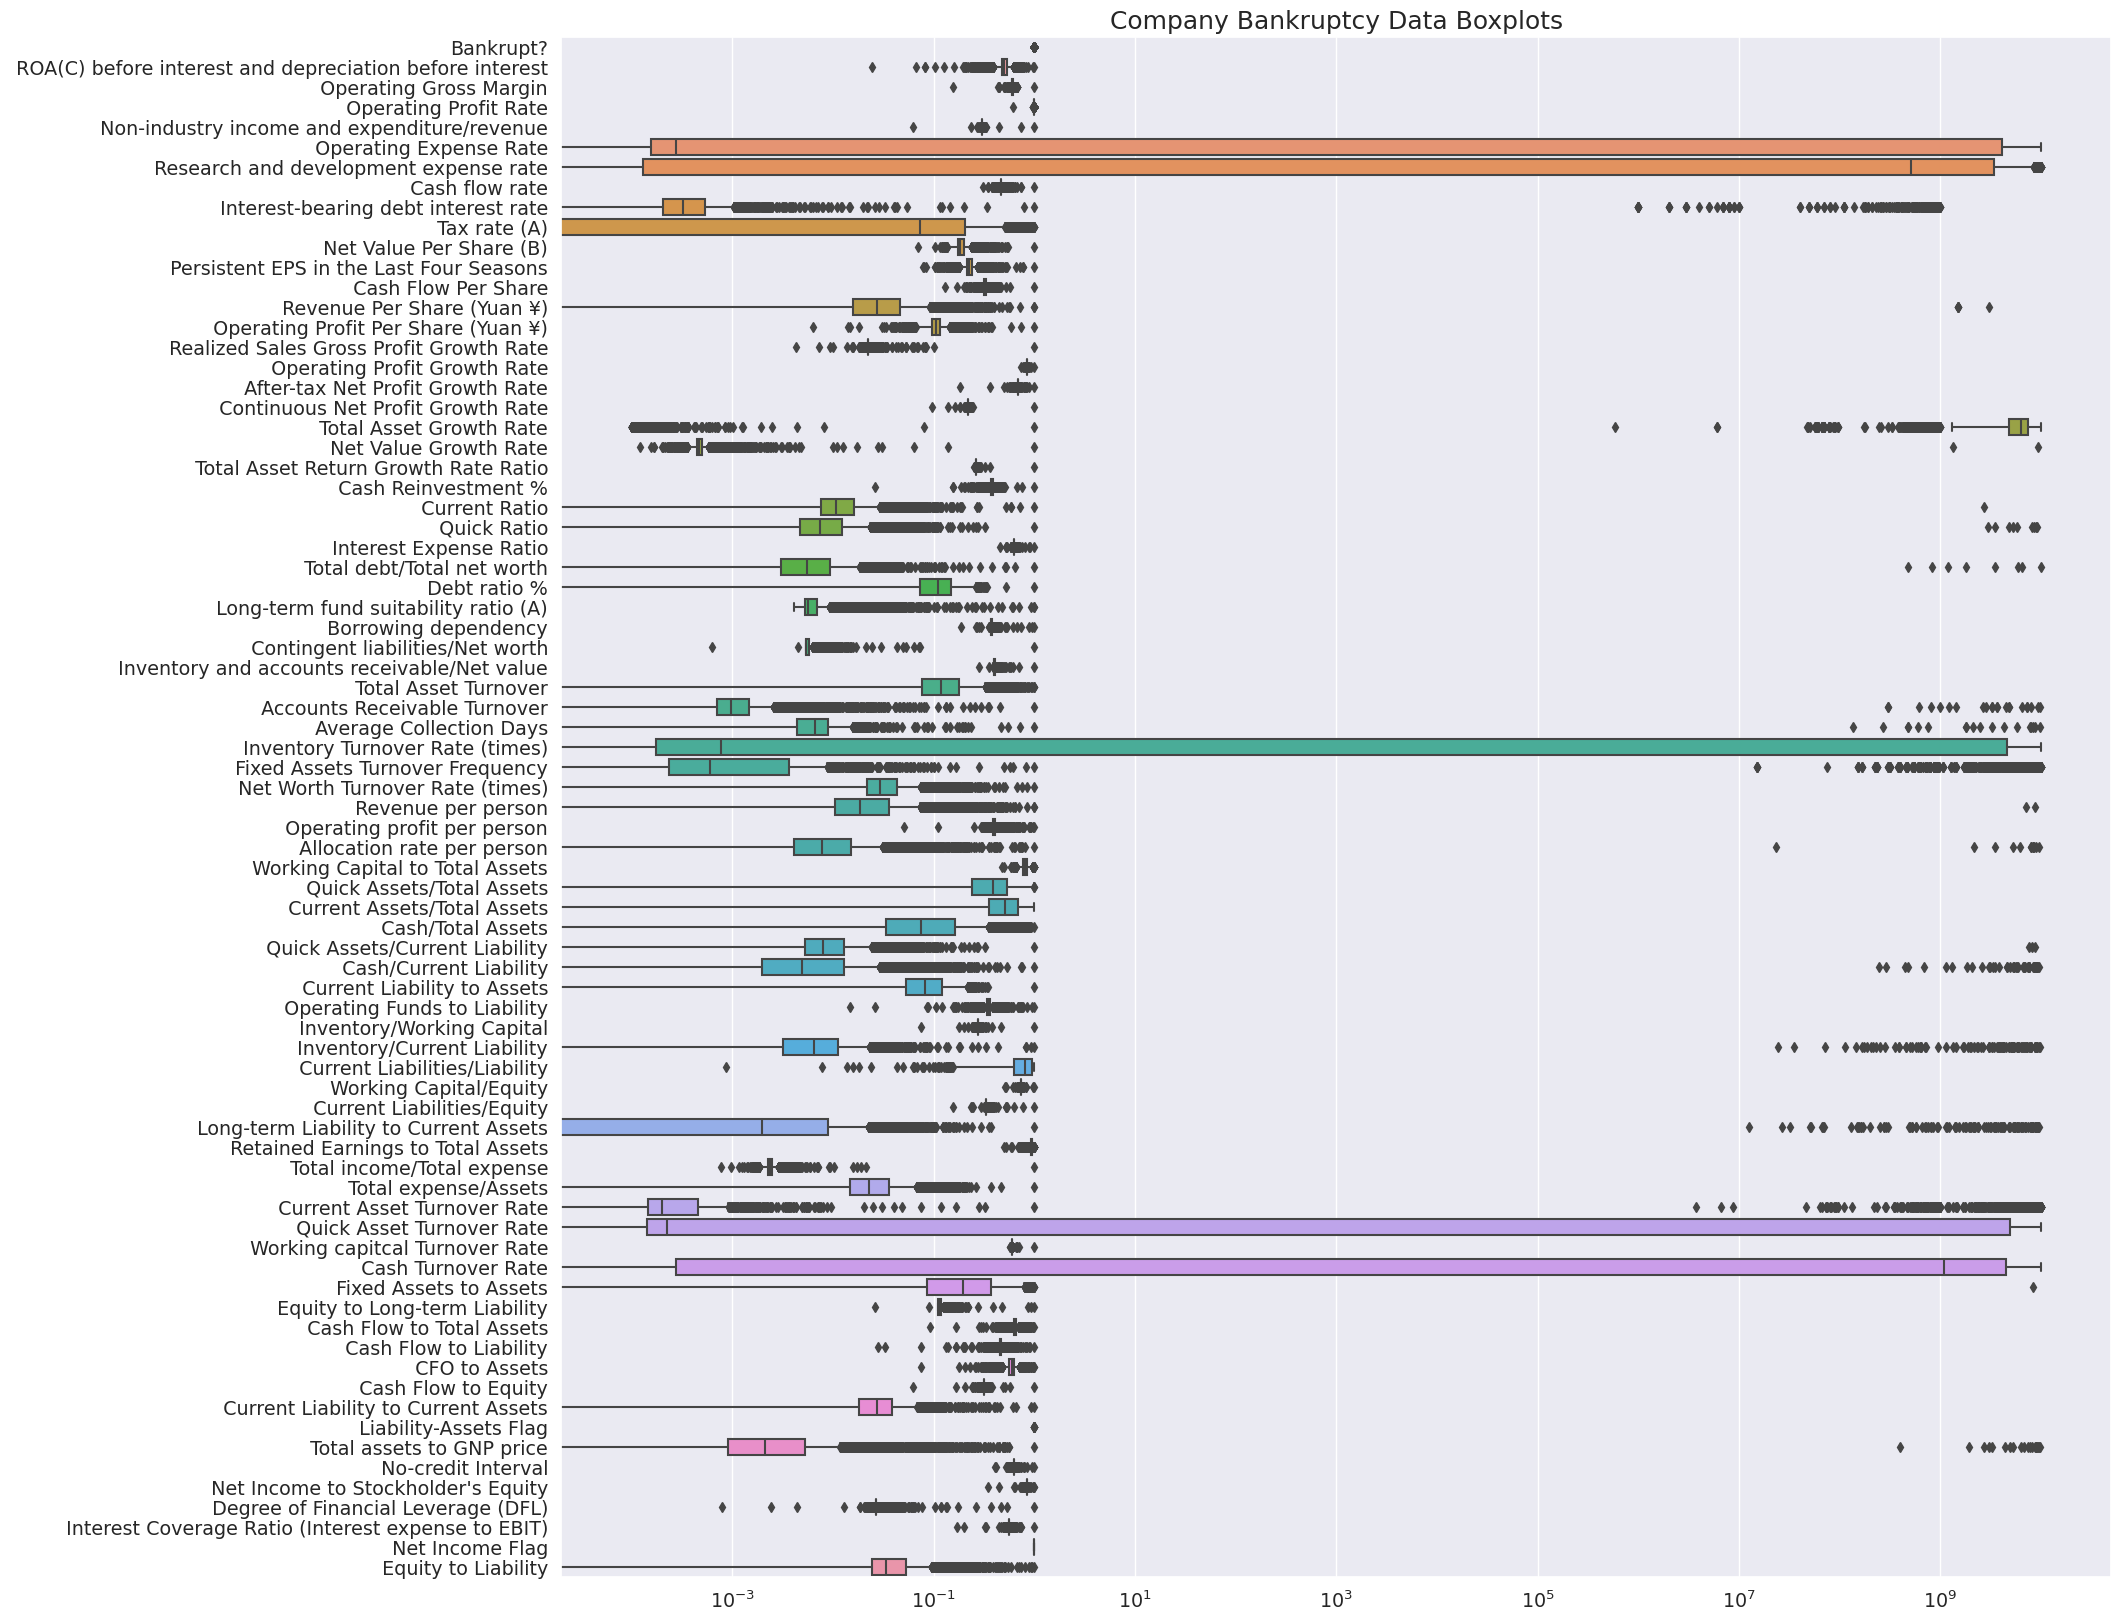

In [ ]:
# Outliers
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Company Bankruptcy Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

# Summary of EDA
- The number of organizations that have gone bankrupt in 10 years between 1999 – 2000 is few.
Several companies possess many assets, which is always a good sign for an organization.
- An organization cannot guarantee not being bankrupt, although owning several assets.
- The organizations in the dataset are running into losses for the past two years as their net income poses to be negative.
- Very few of the organizations that have had negative income in the past two years suffer from bankruptcy.
It is observed that “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets" attributes are a few of the attributes that have a high correlation with the target attribute.
- An increase in the values of the attributes “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets” causes an organization to suffer heavy losses, thus resulting in bankruptcy.
- An increase in the values of the attributes that have a negative correlation with the target attribute helps an organization avoid bankruptcy.
- There seems to be a relation between attributes that have a high correlation with the target attribute and a low correlation with the target attribute.
- We observed several correlations among the top 12 attributes, one of which being “Net Worth/Assets and Debt Ratio %” that is negatively correlated with one another.

# Preprocessing

## Multicollinearity

In [ ]:
# MULTICOLLINEARITY (CORRELATION BETWEEN PREDICTOR VARIABLES)
# finding out correlation coefficient greater than 0.9 and drop them.
cor_matrix = df.corr().abs()
cor_matrix.style.background_gradient(sns.light_palette('Blue', as_cmap=True))

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [ ]:
#Dropping correlated data
#upper triangle of the correlation matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

dropped_cols = set()
for feature in upper_tri.columns:
    if any(upper_tri[feature] > 0.9): #more than 0.9 corr. coeficient -> dropped
        dropped_cols.add(feature)

print("There are %d dropped columns" %len(dropped_cols))

df = df.drop(dropped_cols,axis=1)
df.head()

There are 19 dropped columns


<ipython-input-92-004510710056>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    Operating Gross Margin   Operating Profit Rate  \
0                 0.601457                0.998969   
1                 0.610235                0.998946   
2                 0.601450                0.998857   
3                 0.583541                0.998700   
4                 0.598783                0.998973   

    Non-industry income and expenditure/revenue   Operating Expense Rate  \
0                                      0.302646             1.256969e-04   
1                                      0.303556             2.897851e-04   
2                                      0.302035             2.361297e-04   
3                                      0.303350             1.078888e-04   
4                                      0.303475             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  ...  \
0                              0.000725            0.0  ...   
1                              0.000647            0.0  ...   
2                              0.000790            0.0  ...   
3                              0.000449            0.0  ...   
4                              0.000686            0.0  ...   

    Cash Flow to Equity   Current Liability to Current Assets  \
0              0.312905                              0.118250   
1              0.314163                              0.047775   
2              0.314515                              0.025346   
3              0.302382                              0.067250   
4              0.311567                              0.047725   

    Liability-Assets Flag   Total assets to GNP price   No-credit Interval  \
0                       0                    0.009219             0.622879   
1                       0                    0.008323             0.623652   
2                       0                    0.040003             0.623841   
3                       0                    0.003252             0.622929   
4                       0                    0.003878             0.623521   

    Net Income to Stockholder's Equity   Degree of Financial Leverage (DFL)  \
0                             0.827890                             0.026601   
1                             0.839969                             0.264577   
2                             0.836774                             0.026555   
3                             0.834697                             0.026697   
4                             0.839973                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                                           0.575617                   1   

    Equity to Liability  
0              0.016469  
1              0.020794  
2              0.016474  
3              0.023982  
4              0.035490  

[5 rows x 77 columns]

## Outliers Removal

In [ ]:
# Outliers removal

def outliers_removal(feature,feature_name,dataset):

    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))

    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))

    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)

    return dataset

for col in df:
    new_df = outliers_removal(df[col],str(col),df)

Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.476527080388047 | Quartile 75: 0.535562813825379
iqr: 0.05903573343733198
Cut Off: 0.08855360015599797
 ROA(C) before interest and depreciation before interest Lower: 0.38797348023204903
 ROA(C) before interest and depreciation before interest Upper: 0.624116413981377
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.6004446590466855 | Quartile 75: 0.613914152697502
iqr: 0.01346949365081651
Cut Off: 0.020204240476224766
 Operating Gross Margin Lower: 0.5802404185704608
 Operating Gross Margin Upper: 0.6341183931737269
 Operating Gross Margin outliers for close to bankruptcy cases: 320
-----------------------------------------

## Skewness

In [ ]:
def corr_skew(X):
    s = X.skew().reset_index().rename(columns = {0:'skew'})

    pos = list(s[s['skew']>=1]['index'].values)
    neg = list(s[s['skew']<=-1]['index'].values)

    X[pos] = (X[pos]+1).apply(np.log)
    X[neg] = (X[neg])**3
    return X

- The above function finds the skewness of each column.
Skewness greater than 1 is corrected by using log,
- where as less than -1 is corrected using cube.
- In log I've used +1 to prevent log of 0 if any




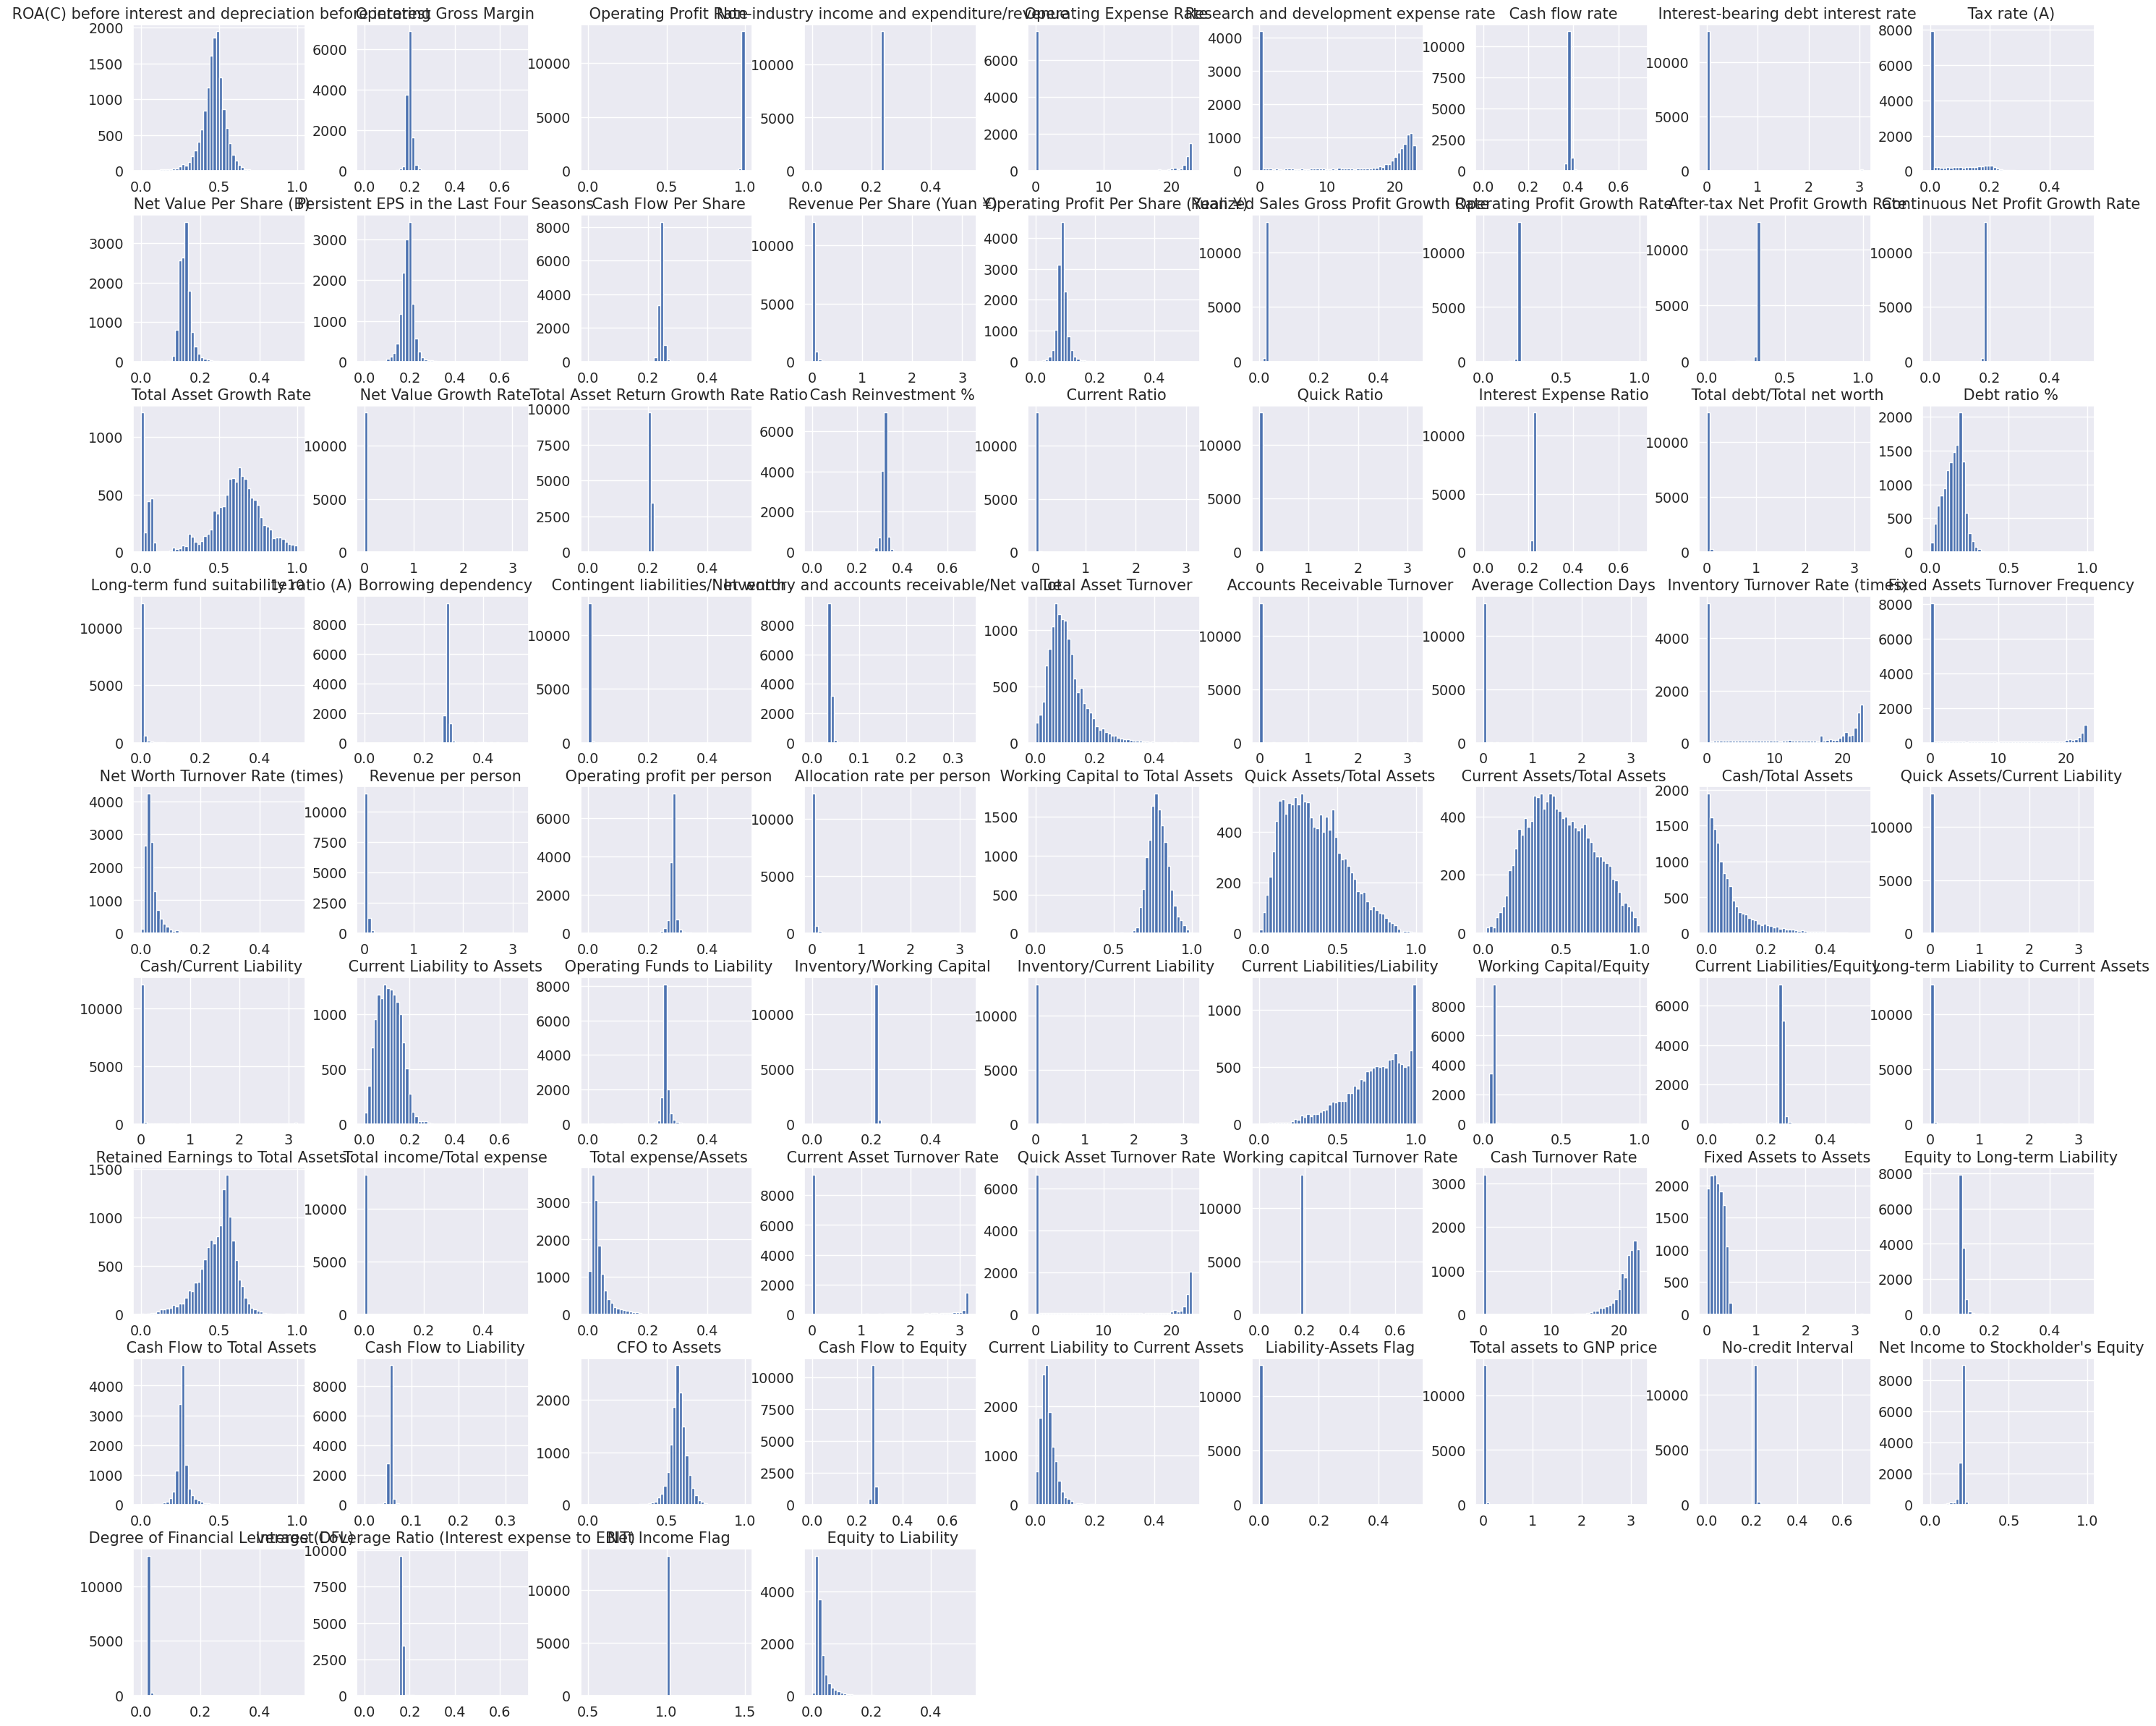

In [ ]:
corr_skew(X).hist(figsize = (35,30),bins = 50)
plt.show()

## Oversampling the Target vaiable using SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#creating independent and dependent feature dataframes
X=df.drop(labels=['Bankrupt?'], axis=1)
y=df['Bankrupt?']
X=corr_skew(X)

In [ ]:
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)

1    6599
0    6599
Name: Bankrupt?, dtype: int64


<Axes: xlabel='Bankrupt?', ylabel='count'>

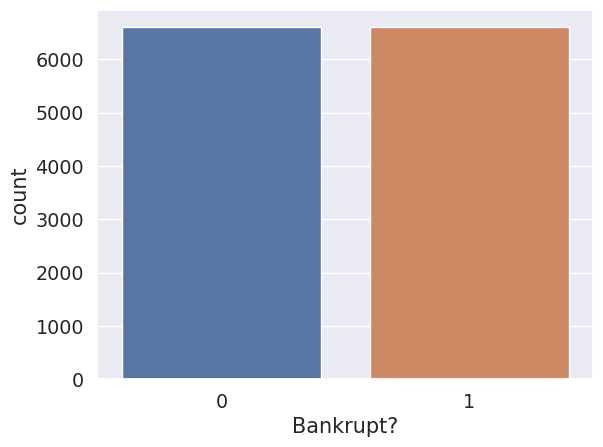

In [ ]:
# this how target feature now looks after resampled using smote
print(y.value_counts())
sns.countplot(x=y)

## Feature Selection

In [ ]:
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest
# to obtain the mutual information values
# to select the features i've used Random forest to select columns based on it's importance
feature_selection=SelectKBest(f_classif,k=30).fit(X,y)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [74] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
selected_features=X.columns[feature_selection.get_support()]

In [ ]:
selected_features

Index([' ROA(C) before interest and depreciation before interest',
       ' Operating Gross Margin', ' Cash flow rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Operating Profit Per Share (Yuan ¥)',
       ' After-tax Net Profit Growth Rate', ' Total Asset Growth Rate',
       ' Debt ratio %', ' Borrowing dependency', ' Total Asset Turnover',
       ' Fixed Assets Turnover Frequency', ' Operating profit per person',
       ' Working Capital to Total Assets', ' Quick Assets/Total Assets',
       ' Cash/Total Assets', ' Cash/Current Liability',
       ' Current Liability to Assets', ' Operating Funds to Liability',
       ' Working Capital/Equity', ' Retained Earnings to Total Assets',
       ' Total expense/Assets', ' Equity to Long-term Liability',
       ' Cash Flow to Total Assets', ' CFO to Assets',
       ' Current Liability to Current Assets',
       ' Net Income to Stockholder's Equity', ' Equ

Selected 30 independent variables out of 96 variables

## Standardize the Independent Variable

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

# Modelling

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3,random_state=123,stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
logi=LogisticRegression()
logi.fit(X_train,y_train)

y_pred=logi.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))


              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1980
           1       0.89      0.93      0.91      1980

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

[[1742  238]
 [ 146 1834]]
Logistic Regression accuracy is: 90.30%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=10)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1980
           1       0.97      0.99      0.98      1980

    accuracy                           0.98      3960
   macro avg       0.98      0.98      0.98      3960
weighted avg       0.98      0.98      0.98      3960

[[1917   63]
 [  13 1967]]
Random Forest accuracy is: 98.08%


## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

sv=SVC(kernel= 'rbf')

sv.fit(X_train,y_train)

y_pred=sv.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
svmAcc = accuracy_score(y_pred,y_test)
print('SVM accuracy is: {:.2f}%'.format(svmAcc*100))


              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1980
           1       0.93      0.99      0.96      1980

    accuracy                           0.96      3960
   macro avg       0.96      0.96      0.96      3960
weighted avg       0.96      0.96      0.96      3960

[[1832  148]
 [  23 1957]]
SVM accuracy is: 95.68%


## XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb=XGBClassifier(n_estimators=100)

xgb.fit(X_train,y_train)

y_pred=xgb.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
xgAcc = accuracy_score(y_pred,y_test)
print('XGBoost Regression accuracy is: {:.2f}%'.format(xgAcc*100))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1980
           1       0.98      0.99      0.99      1980

    accuracy                           0.99      3960
   macro avg       0.99      0.99      0.99      3960
weighted avg       0.99      0.99      0.99      3960

[[1945   35]
 [  10 1970]]
XGBoost Regression accuracy is: 98.86%


## Comparing Different ML Models

In [ ]:
models = {}

#Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import SVC
models['Support Vector Machines'] = SVC(kernel= 'rbf')

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier(n_estimators=10)

# XGBoost
from xgboost import XGBClassifier
models['XGBoost']=XGBClassifier(n_estimators=100)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():
    # Fit the classifier
    models[key].fit(X_train, y_train)

    # Make predictions
    predictions = models[key].predict(X_test)

    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key]= f1_score(predictions, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall','f1-score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['f1-score']= f1.values()
#df_model.sort_values(by='Accuracy', ascending=False)
models_style = df_model.sort_values(by="f1-score", ascending=False)
models_style.style.format("{:.2%}").background_gradient(cmap="Blues")

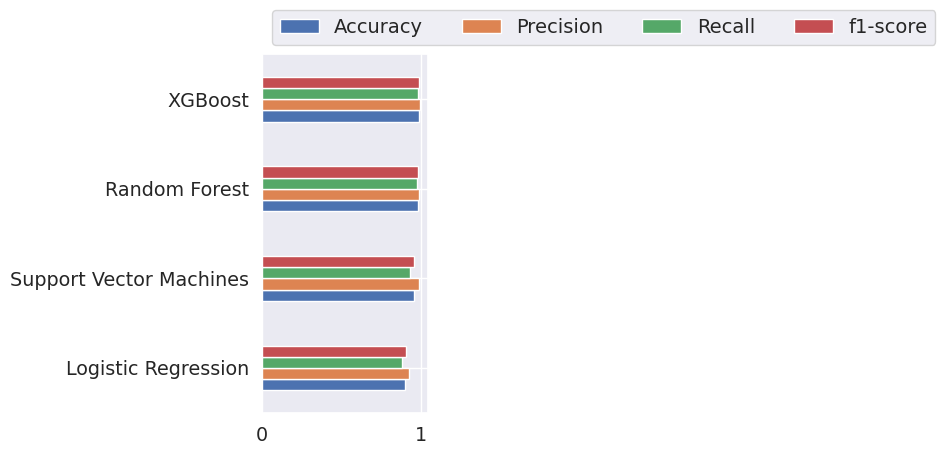

In [ ]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()),
    bbox_to_anchor=(0, 1),
    loc='lower left',
    prop={'size': 14}
)
plt.tight_layout()

# Evaluation Metrics

- Accuracy is not a good choice of metrics here as this data is imbalanced. So I will be using **Precision, F1 Score**  for evaluation.

- In this problem, It is important to predict the positive class with very high accuracy even if we are not able to predict the negative class.


# Conclusion

- Top 3 performing baseline models are XGBoost,Random forest & SVM.

- The best performing model is XGBoost by considering the F1 score,Precision which is an ideal metric to choose because in this problem, It is important to predict the positive class with very high accuracy even if we are not able to predict the negative class.

- There are high chances that a company can go Bankrupt if the attributes
“Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets”are high.

- Net Income Flag plot showed us that most of the companies are running into Losses for the past 2 years.


- Analyzing the dataset and building the best model to predict bankruptcy is been done successfully.